In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

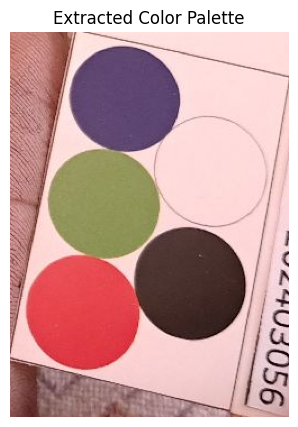

In [12]:


# Load the image
image_path = 'data2.jpg'  # Path to the input image
image = cv2.imread(image_path)

# Convert to grayscale for edge detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred_image, 200, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours to find the palette region (largest rectangle near the center-right)
palette_contour = None
max_area = 0

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    if area > max_area:  # Looking in the right half of the image
        max_area = area
        palette_contour = (x, y, w, h)

# Extract and save the color palette region if found
if palette_contour:
    x, y, w, h = palette_contour
    palette_image = image[y:y+h, x:x+w]
    palette_image_path = '/mnt/data/extracted_palette.jpg'  # Path to save the segmented palette
    cv2.imwrite(palette_image_path, palette_image)
    
    # Display the extracted palette
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(palette_image, cv2.COLOR_BGR2RGB))
    plt.title("Extracted Color Palette")
    plt.axis("off")
    plt.show()
else:
    print("No palette region detected.")
